In [20]:
%pylab inline
import pandas as pd
from sys import platform
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from geopy.geocoders import Nominatim
import folium

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    # path = '~/Documents/GitHub/f1-analytics/'
    path = '/Users/oliverjcarter/Documents/GitHub/f1-analytics/'
    

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
### Load race and mereged DataFrames

data = pd.read_csv(path + 'data/results.csv')
merged = pd.read_csv(path + 'data/merged.csv')

In [22]:
incidents = data.query(
    'status != "Finished"'
).status.value_counts()

### Only car statuses that did not finish race are included
incidents = incidents[~incidents.index.str.contains('Lap')]

incidents

Collision           119
Engine               59
Accident             59
Brakes               45
Retired              38
Power Unit           35
Gearbox              33
Collision damage     32
Suspension           24
Electrical           13
Power loss           11
Wheel                11
Hydraulics           10
Withdrew              9
Oil leak              8
Disqualified          7
Puncture              7
Spun off              6
Exhaust               5
Overheating           5
Mechanical            5
Turbo                 5
Battery               5
ERS                   5
Tyre                  4
Electronics           4
Water pressure        4
Wheel nut             3
Transmission          3
Fuel pressure         3
Throttle              2
Driveshaft            2
Damage                2
Clutch                2
Rear wing             2
Water leak            2
Oil pressure          2
Illness               2
Front wing            2
Fuel system           1
Excluded              1
Vibrations      

[]

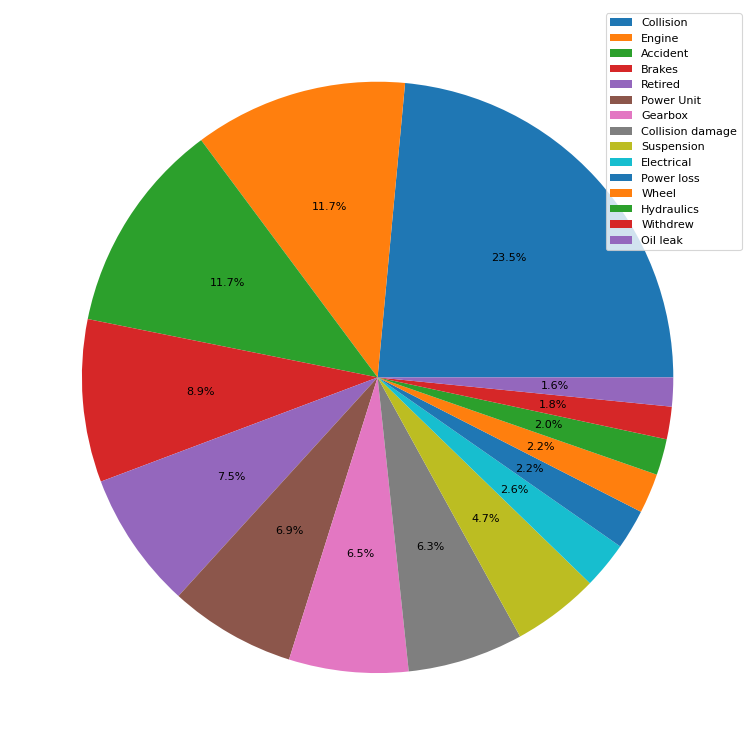

In [23]:
top_incidents = incidents[:15]

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(15, 12)

axs.set_title('')
axs.pie(top_incidents.values, autopct='%1.1f%%')
axs.legend(top_incidents.index, loc=1)
plt.plot()

In [63]:
def format_status(x):
    incident_dict = {
        # 'Lapped': ['+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Lap', '+7 Lap', '+8 Lap'],
        'Mechanical Failure': ['Radiator', 'Spark plugs', 'Steering', 'Out of fuel', 'Seat', 'Vibrations','Brake duct','Drivetrain','Fuel system','Technical','Clutch', 'Water leak', 'ERS', 'Battery', 'Tyre', 'Oil pressure', 'Throttle', 'Retired', 'Gearbox', 'Exhaust','Suspension', 'Electronics', 'Wheel', 'Fuel pressure', 'Brakes', 'Engine', 'Overheating', 'Power Unit', 'Mechanical', 'Power loss', 'Water pressure', 'Driveshaft', 'Transmission', 'Electrical', 'Wheel nut', 'Turbo', 'Hydraulics', 'Oil leak'],
        'Collision': ['Spun off', 'Front wing', 'Collision damage', 'Accident', 'Collision', 'Debris', 'Puncture', 'Damage', 'Rear wing'],
        'Other': ['Illness', 'Withdrew', 'Disqualified', 'Excluded']
    }
    for col in incident_dict:
        if x in incident_dict[col]:
            return col
    
    return x

In [64]:
data['actual'] = data.status.apply(lambda x: format_status(x))

data.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,fastest_lap,actual
0,2014,1,albert_park,rosberg,1985-06-27,German,mercedes,3,5578710.0,Finished,25.0,1,1:32.478,Finished
1,2014,1,albert_park,kevin_magnussen,1992-10-05,Danish,mclaren,4,5605487.0,Finished,18.0,2,1:33.066,Finished
2,2014,1,albert_park,button,1980-01-19,British,mclaren,10,5608737.0,Finished,15.0,3,1:32.917,Finished
3,2014,1,albert_park,alonso,1981-07-29,Spanish,ferrari,5,5613994.0,Finished,12.0,4,1:33.186,Finished
4,2014,1,albert_park,bottas,1989-08-28,Finnish,williams,15,5626349.0,Finished,10.0,5,1:32.616,Finished


In [65]:
incidents = data.query(
    'actual != "Finished"'
).actual.value_counts()

### Only car statuses that did not finish race are included
incidents = incidents[~incidents.index.str.contains('Lap')]

incidents

Mechanical Failure    358
Collision             230
Other                  19
Name: actual, dtype: int64

[]

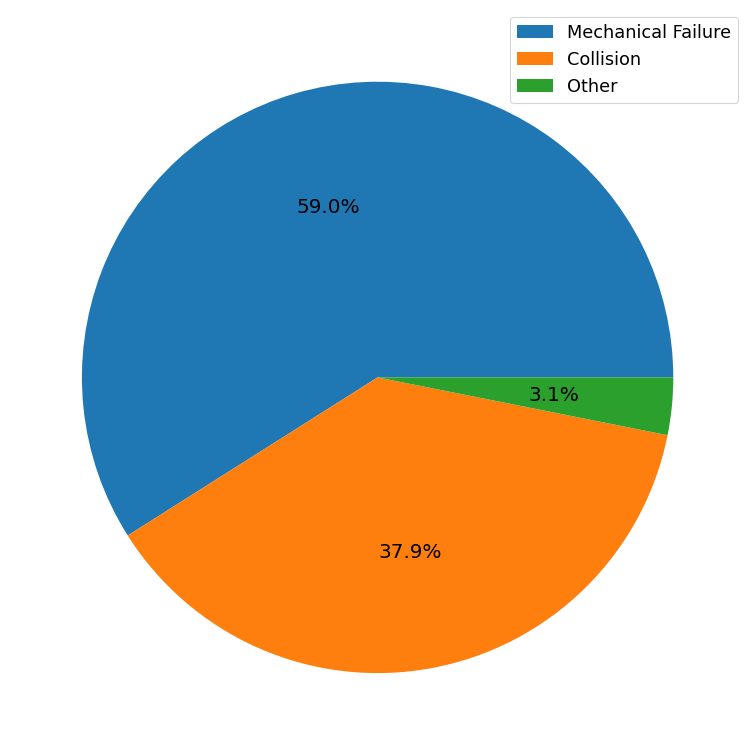

In [75]:
fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(15, 12)

axs.set_title('')
axs.pie(incidents.values, autopct='%1.1f%%', textprops={'fontsize': 18})
axs.legend(incidents.index, loc=1, prop={'size': 16})
plt.plot()

In [78]:
data.query('status == "Withdrew"')

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,fastest_lap,actual
43,2014,2,sepang,perez,1990-01-26,Mexican,force_india,14,NaN,Withdrew,0.0,22,NaN,Other
131,2014,6,monaco,maldonado,1985-03-09,Venezuelan,lotus_f1,15,NaN,Withdrew,0.0,22,NaN,Other
422,2015,1,albert_park,kvyat,1994-04-26,Russian,red_bull,12,NaN,Withdrew,0.0,16,NaN,Other
423,2015,1,albert_park,kevin_magnussen,1992-10-05,Danish,mclaren,17,NaN,Withdrew,0.0,17,NaN,Other
424,2015,1,albert_park,bottas,1989-08-28,Finnish,williams,0,NaN,Withdrew,0.0,18,NaN,Other
1114,2016,15,marina_bay,grosjean,1986-04-17,French,haas,20,NaN,Withdrew,0.0,22,NaN,Other
1224,2016,20,interlagos,grosjean,1986-04-17,French,haas,7,NaN,Withdrew,0.0,22,NaN,Other
2426,2019,18,rodriguez,norris,1999-11-13,British,mclaren,8,NaN,Withdrew,0.0,20,1:21.643,Other
2763,2020,14,istanbul,kevin_magnussen,1992-10-05,Danish,haas,13,NaN,Withdrew,0.0,17,1:40.948,Other
